<a href="https://colab.research.google.com/github/cavedave/ai-email-classifier/blob/main/EmailClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email classifier

# 1. Outcomes
- Create a simple email classifier
- Run classifier remotely on `Google Colab` with a `Google Gemini` key
- Use an `in notebook UI` to test your classifier live
- Home Exercise 
  - Run this on your local machine to deepen your knowledge
  - Connect it to an alternative LLM e.g. Ollama etc. 

WARNING: Do not download LLM models to your machine while in the workshop as it will make WiFi unusable 

# 2. Beginner Google Setup

1. In the top left of this notebook you will see a button `Open in Colab`. **Click on it**
2. Create an account or login using your Google account.
3. Go to https://colab.research.google.com/ and add this key as a secret. If you did click on the open this in Colab you have Colab open already.

In [ ]:
 #test to make sure notebook is alive
1+1

# 3. Load libraries and such on a good network

In [ ]:
# Install the official Google Generative AI SDK
!pip install -U google-generativeai

# Import required libraries
import google.generativeai as genai
import ipywidgets as widgets
from IPython.display import display, HTML
from google.colab import userdata

# 4. Get a Google Gemini Key

1. Visit https://ai.google.dev/gemini-api/docs/api-key to get api key. An api key is like a password that tells google you are allowed ask it questions.

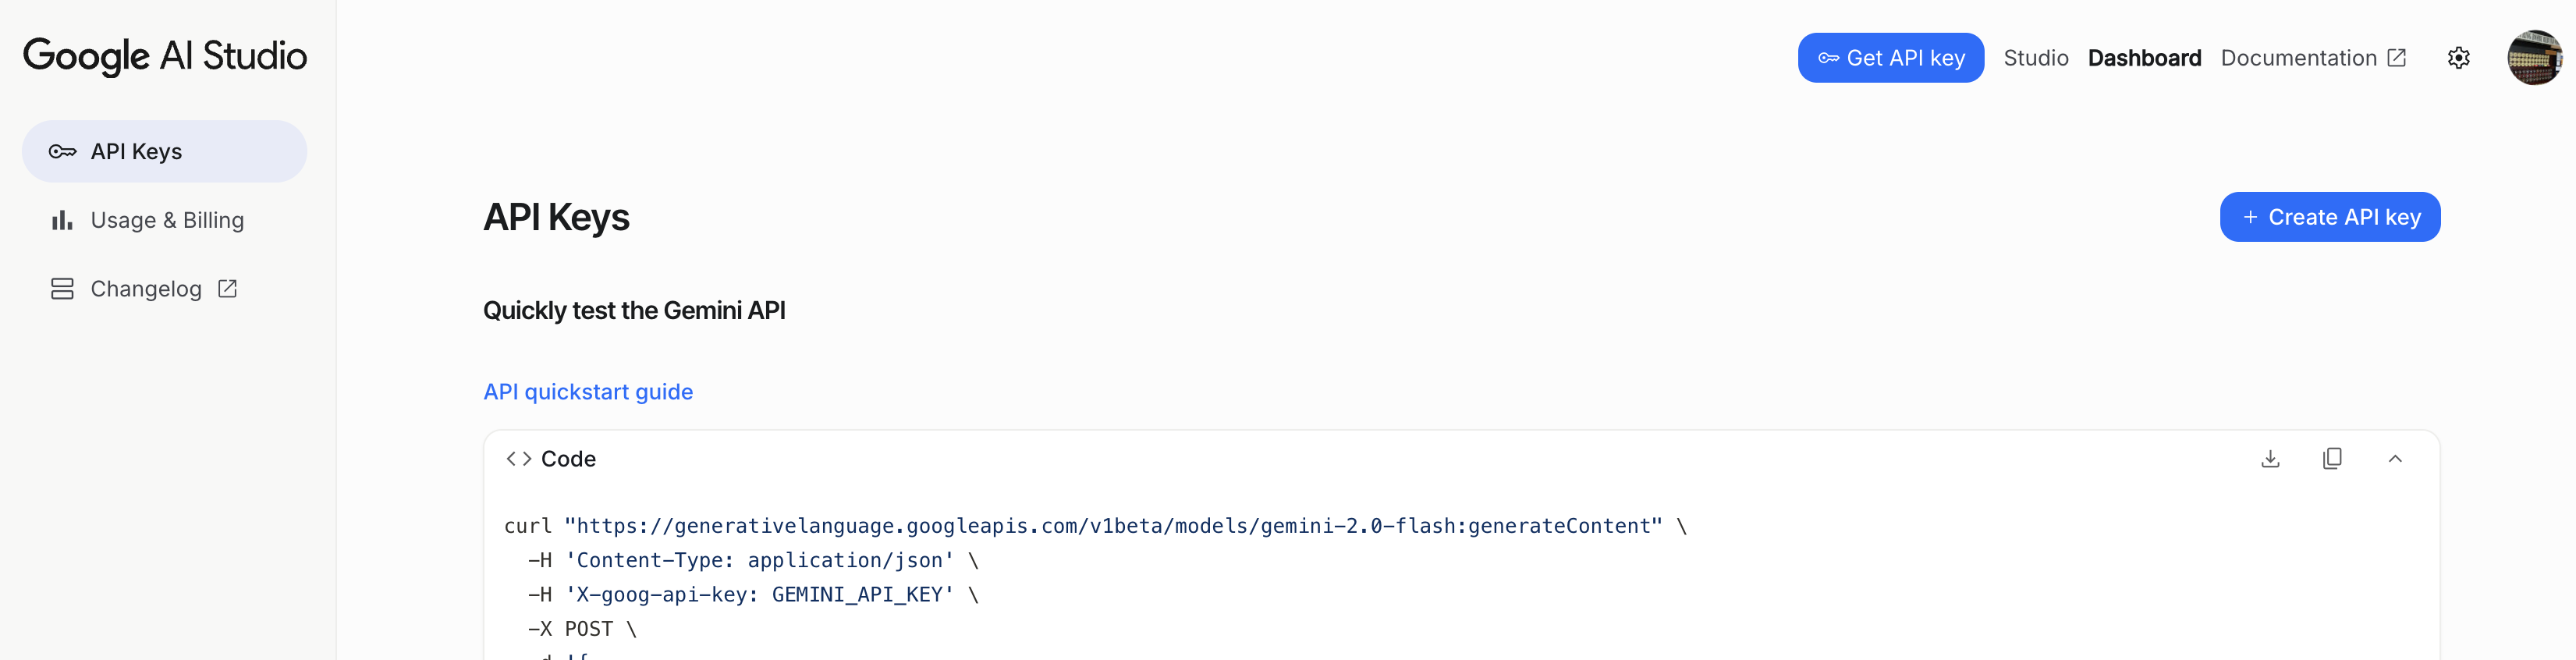

2. Load a key into your secrets. The key on the left

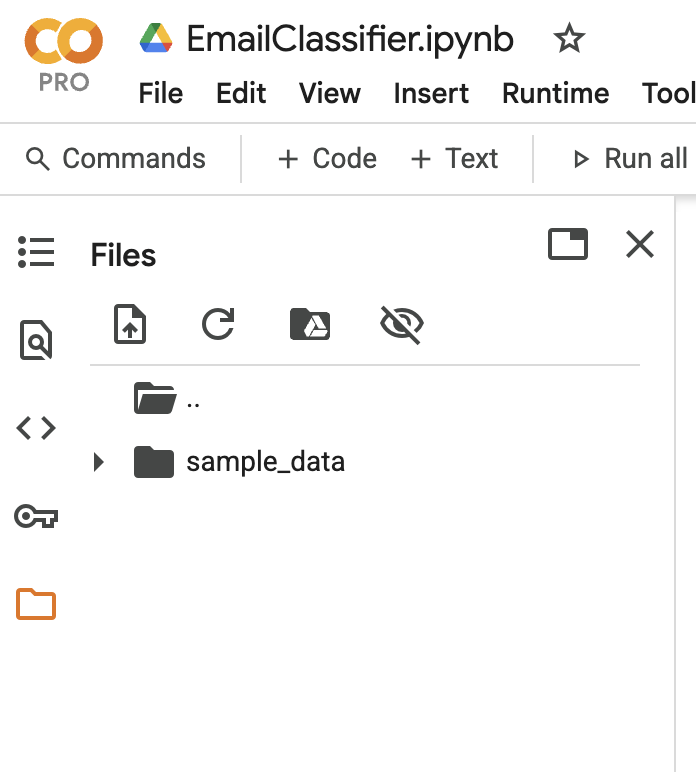

To select a key press the `Google API keys` and then import / manage your keys.

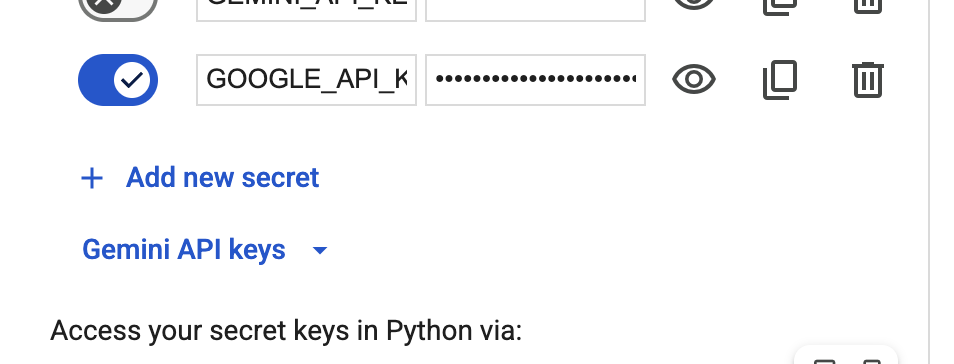

In [ ]:
# Use Colab's secret manager to safely store your API key
try:
  API_KEY = userdata.get('GOOGLE_API_KEY')#it is called GEMINI_API_KEY in image above this is the default variable name assigned by Google
  genai.configure(api_key=API_KEY)
  print('API key loaded and configured.')
except userdata.SecretNotFoundError:
  print('Please create a secret named "Google_API_KEY" in the Colab sidebar and paste your API key there.')
except Exception as e:
  print(f'An error occurred: {e}')

# 5. Define the Classification Logic

This is a starter prompt, you will change later, but its a good start.

In [ ]:
# Define the new labels and the JSON-enforced configuration
from google.colab import userdata
from google.generativeai import types

LABELS = ["CarBreakdown", "CarCrash", "CarRenewal", "CarTheft", "CarWindshield", "Other"]
PROMPT = f"""
You are an email classifier. I will give you text from an email and you will classify it into exactly one of the following categories: {', '.join(LABELS)}.

Your output must be a single word that is one of the categories above. Do not include any other text or punctuation.

Example 1:
Input: 'I can't start my engine this morning'
Output: CarBreakdown

Example 2:
Input: 'my car crashed into another car?'
Output: CarCrash

Example 3:
Input: 'what are your operating hours?'
Output: Other
"""

classify_config = types.GenerationConfig(
    response_mime_type="application/json",
    response_schema={
        "type": "string",
        "enum": LABELS,
    },
    temperature=0.0,
)

model = genai.GenerativeModel('gemini-1.5-flash', system_instruction="Return exactly one label for the user's message.")

# The function that will run the classification
def classify_email(text):
    if not text:
        return 'No input text provided.'

    try:
        response = model.generate_content(PROMPT + f'\nInput: "{text}"\nOutput:', generation_config=classify_config)
        # The API is configured to return a string, so we can access it directly
        classification = response.text.strip().replace('"', '')
        return classification
    except Exception as e:
        return f'Error during classification: {e}'

Quick test

In [ ]:
# Classification (returns a Python string via .parsed)
# Now using the classify_email function defined in the UI cell

for text in [
    "windshield cracked and needs repair",
    "premium up 20% at renewal, add named driver?",
    "my car crashed into another car?",
    "car windshield broken can you help fix it?"
]:
    # Call the classify_email function
    classification = classify_email(text)
    # The classify_email function already returns the classification result
    print(text, "->", classification)

# 6. Create the Interactive User Interface

In [ ]:
# Create the input and output widgets
text_input = widgets.Textarea(
    placeholder='Enter text to classify...\n\nExample:\nwindshield cracked and needs repair\npremium up 20% at renewal, add named driver?\nmy car crashed into another car?',
    description='Text:',
    layout=widgets.Layout(width='100%', height='120px')
)

classify_button = widgets.Button(
    description='Classify',
    button_style='success',
    layout=widgets.Layout(width='auto', flex='1 1 auto')
)

clear_button = widgets.Button(
    description='Clear',
    button_style='warning',
    layout=widgets.Layout(width='auto', flex='1 1 auto')
)

output_area = widgets.Output()

# Define button click actions
def on_classify_button_clicked(b):
    with output_area:
        output_area.clear_output()
        input_text = text_input.value
        if input_text:
            classification_result = classify_email(input_text)
            html_output = f"""
            <div class="result-box">
                <p><strong>Input:</strong> {input_text}</p>
                <p><strong>Classification:</strong> <span style="color: #667eea; font-weight: bold;">{classification_result}</span></p>
                <hr style="margin: 10px 0; border: 1px solid #eee;">
            </div>
            """
            display(HTML(html_output))
        else:
            display(HTML('<div class="result-box"><p>Please enter some text to classify.</p></div>'))

def on_clear_button_clicked(b):
    text_input.value = ''
    with output_area:
        output_area.clear_output()

# Connect button actions to the functions
classify_button.on_click(on_classify_button_clicked)
clear_button.on_click(on_clear_button_clicked)

# Arrange the widgets
button_box = widgets.HBox([classify_button, clear_button], layout=widgets.Layout(justify_content='center'))
ui = widgets.VBox([
    widgets.HTML('<h1>LLM Email Classifier</h1><p>Simple text → classification using Gemini 2.5 Flash</p>'),
    widgets.HTML('<h3>Text Input</h3>'),
    text_input,
    button_box,
    widgets.HTML('<h3>Classification Result</h3>'),
    output_area
], layout=widgets.Layout(padding='10px', border='1px solid #ccc'))

# Display the user interface
display(ui)

**Examples to test**

car windshield broken

car windshield broken can you help fix it?

i crashed my car can i make a claim?



# 7. What we don't have

1.   Improvement Testing to see how good this model or prompt is in a set of tests
2.   Full control over our training
3.   Run locally (If you have gmail and google drive that data not local)
4.   A nice UI with Voila https://github.com/voila-dashboards/voila
5.   An even nicer UI with https://streamlit.io/ 

# 8. Very Basics of AI product Dev




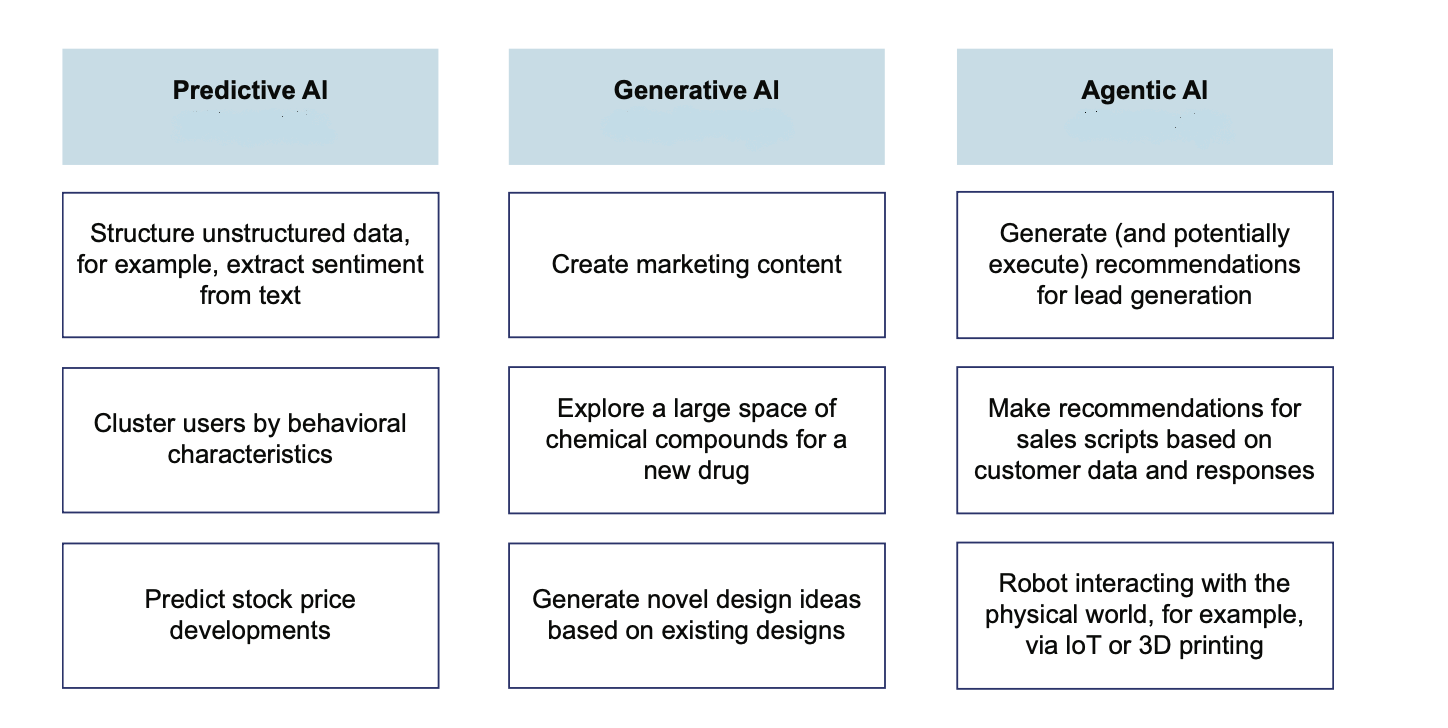

We are just doing predictive this evening.

Agentic means program can call an API e.g.:

*   Get me the weather
*   Get me the unread emails
*   Get claims

# 9. AI System

What are you building?

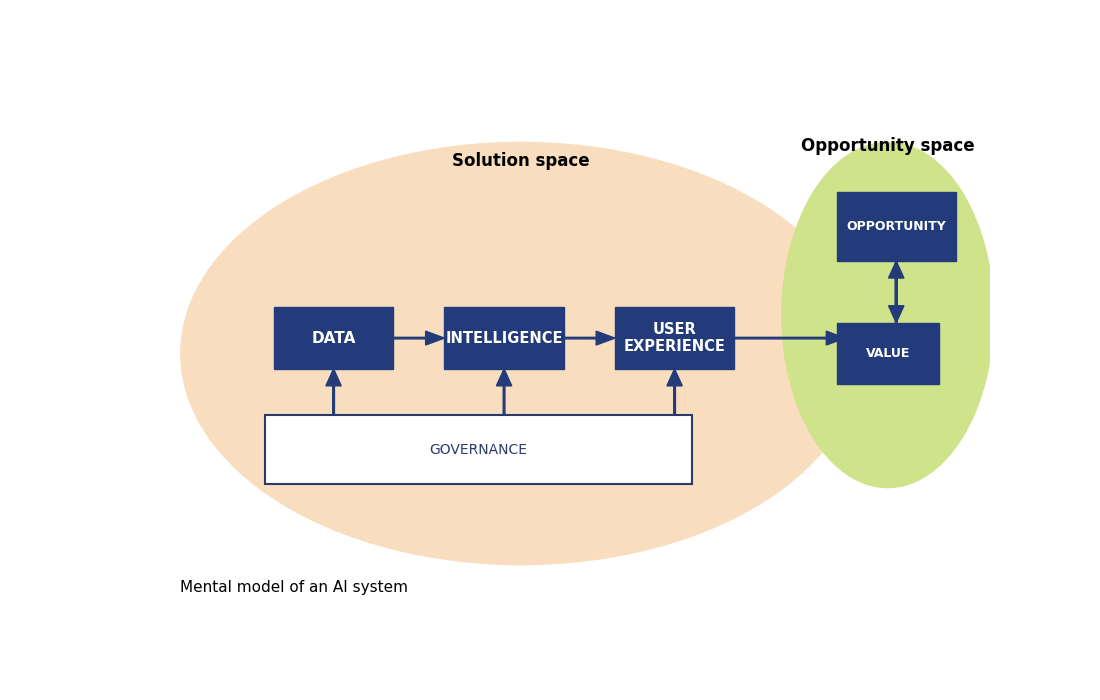

Governance 
* Is important, but less so if you are just doing on your machine what your machine would do anyway. 
* Governance here includes: 
  * Can we look at this data. 
  * Who is running and learning from the intelligence.

Data 
* Is a really common issue. 
* Use real data. 
* Manipulating it well is a major challenge. 
* I broke this rule today.

Intelligence (the ML and AI models) 
* Easy to use as a service.

User Experience 
* Be able to tell a users journey down to the level of what & when they click. 
* Make sure you use the words they use. 
* Building for yourself makes User Experience easier.

Opportunity 
* What do we want to do

Value 
* How much would it be worth? 
* Does it help you or potentially lots of people.

# 10. DevOps

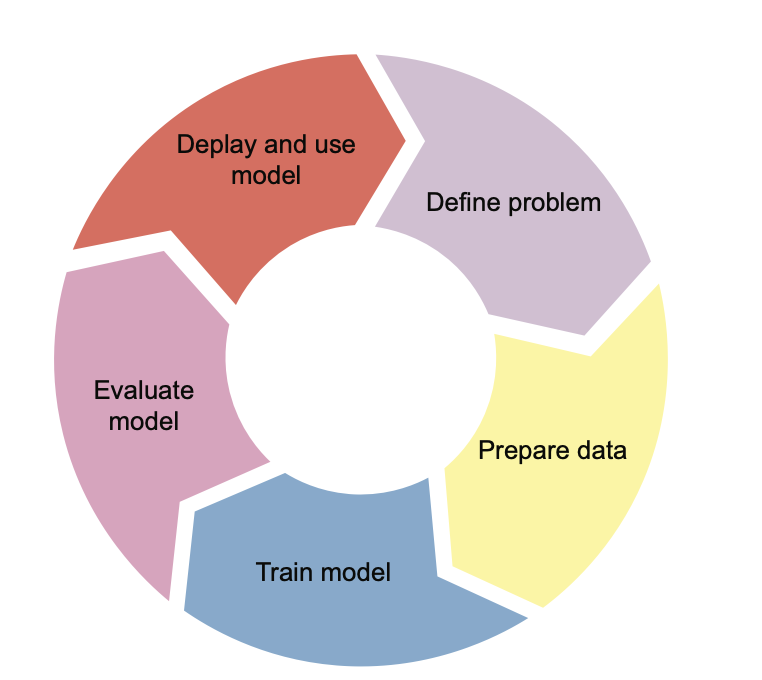

You do the same look. But you don't consider getting your brain to learn the difference between a good/bad/urgent/valuable  invoice/request/email/sales lead training a model.

# 11. Is this worth doing?

You need to be able to estimate the following costs 

If you build the tool yourself you can
- Get Development and running really cheap
- Fix the early mistakes cheaply (your time)
- Limit what mistakes cost. Start with a tool that helps workers not talks to customers directly.
- Estimate costs for manual version of process e.g. time it for a day.

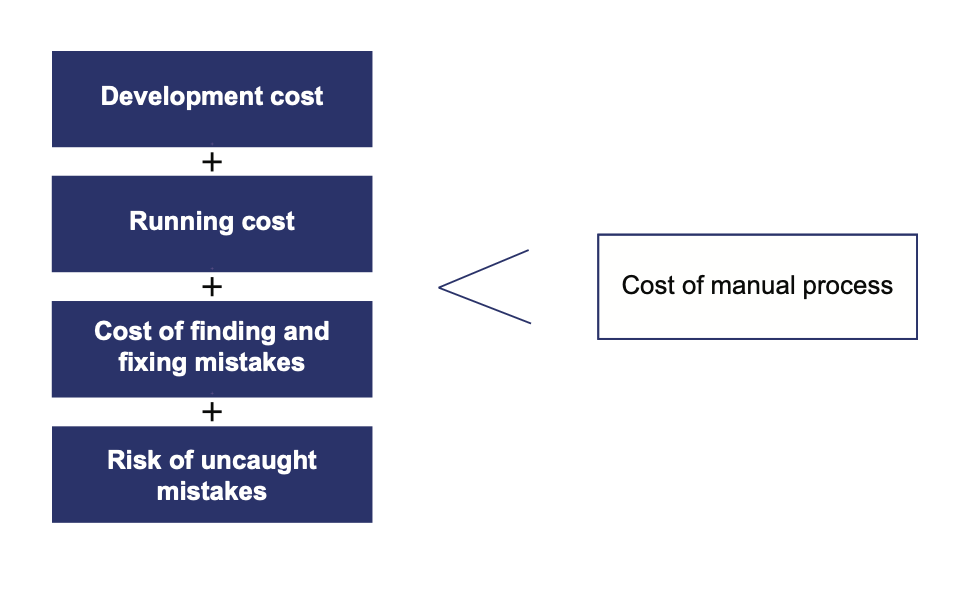